<a href="https://colab.research.google.com/github/arcarrion/churn_prediction/blob/master/notebooks/01_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Things to consider:
- Dataset already built, with target variable to predict, and the two classes to predict: churn/no churn. No need to add more data (since we do not have access to it), for the case it is enough with this

# Read data

In [0]:
raw_data = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [38]:
print(raw_data.shape)

(7043, 21)


In [39]:
print(raw_data.head(5))

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]


In [40]:
print(raw_data.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [41]:
print(raw_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [42]:
[raw_data[column].unique() for column in raw_data.columns.values]

[array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([0, 1]),
 array(['Yes', 'No'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 array(['No', 'Yes'], dtype=object),
 array(['No phone service', 'No', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['Yes', 'No', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No in

In [43]:
raw_data['TotalCharges_num'] = pd.to_numeric(raw_data['TotalCharges'], errors='coerce')
display(raw_data.loc[raw_data.TotalCharges_num.isnull(), :])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_num
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,NaN
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,NaN
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN


In [0]:
raw_data.loc[raw_data.TotalCharges.isnull(), 'TotalCharges_num'] = 0


Number of NA: 0, 0.0%


,gender,percent
gender,,
Female,3488,49.52435
Male,3555,50.47565


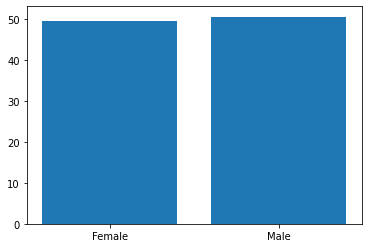

In [45]:
fig_gender, ax_gender = plt.subplots()
gender_data = raw_data.groupby('gender').agg({'gender': 'count'})
gender_data['percent'] = gender_data.gender*100/sum(gender_data.gender)
print(f'Number of NA: {raw_data.gender.isnull().sum()}, {raw_data.gender.isnull().sum()*100/raw_data.shape[0]}%')
display(gender_data)
plt.bar(gender_data.index.values, gender_data.percent)
plt.show()


Number of NA: 0, 0.0%


,SeniorCitizen,percent
SeniorCitizen,,
0,5901,83.785319
1,1142,16.214681


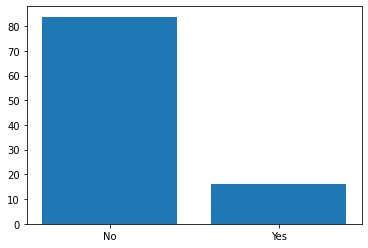

In [46]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('SeniorCitizen').agg({'SeniorCitizen': 'count'})
attribute_data['percent'] = attribute_data.SeniorCitizen*100/sum(attribute_data.SeniorCitizen)
print(f'Number of NA: {raw_data.gender.isnull().sum()}, {raw_data.gender.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.xticks(attribute_data.index.values, ('No', 'Yes'))
plt.show()

Number of NA: 0, 0.0%


,Partner,percent
Partner,,
No,3641,51.69672
Yes,3402,48.30328


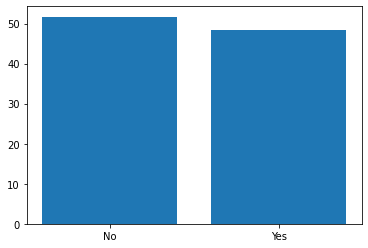

In [47]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('Partner').agg({'Partner': 'count'})
attribute_data['percent'] = attribute_data.Partner*100/sum(attribute_data.Partner)
print(f'Number of NA: {raw_data.Partner.isnull().sum()}, {raw_data.Partner.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.xticks(attribute_data.index.values, ('No', 'Yes'))
plt.show()

Number of NA: 0, 0.0%


,Dependents,percent
Dependents,,
No,4933,70.041176
Yes,2110,29.958824


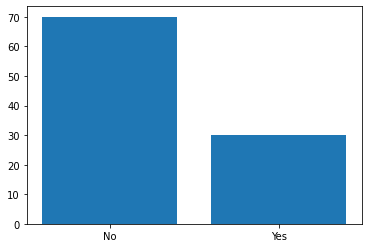

In [48]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('Dependents').agg({'Dependents': 'count'})
attribute_data['percent'] = attribute_data.Dependents*100/sum(attribute_data.Dependents)
print(f'Number of NA: {raw_data.Dependents.isnull().sum()}, {raw_data.Dependents.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.xticks(attribute_data.index.values, ('No', 'Yes'))
plt.show()

Number of NA: 0, 0.0%


,tenure,percent
tenure,,
0,11,0.156183
1,613,8.703677
2,238,3.379242
3,200,2.839699
4,176,2.498935
...,...,...
68,100,1.419849
69,95,1.348857
70,119,1.689621


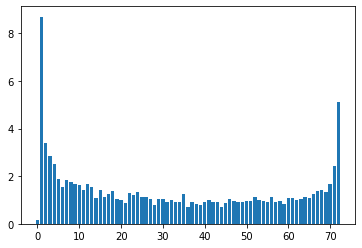

In [49]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('tenure').agg({'tenure': 'count'})
attribute_data['percent'] = attribute_data.tenure*100/sum(attribute_data.tenure)
print(f'Number of NA: {raw_data.tenure.isnull().sum()}, {raw_data.tenure.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,PhoneService,percent
PhoneService,,
No,682,9.683374
Yes,6361,90.316626


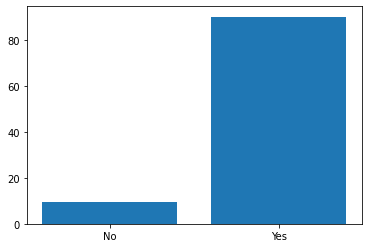

In [50]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('PhoneService').agg({'PhoneService': 'count'})
attribute_data['percent'] = attribute_data.PhoneService*100/sum(attribute_data.PhoneService)
print(f'Number of NA: {raw_data.PhoneService.isnull().sum()}, {raw_data.PhoneService.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,MultipleLines,percent
MultipleLines,,
No,3390,48.132898
No phone service,682,9.683374
Yes,2971,42.183729


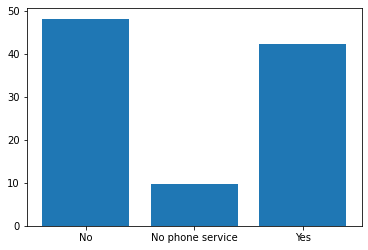

In [51]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('MultipleLines').agg({'MultipleLines': 'count'})
attribute_data['percent'] = attribute_data.MultipleLines*100/sum(attribute_data.MultipleLines)
print(f'Number of NA: {raw_data.MultipleLines.isnull().sum()}, {raw_data.MultipleLines.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,InternetService,percent
InternetService,,
DSL,2421,34.374556
Fiber optic,3096,43.958540
No,1526,21.666903


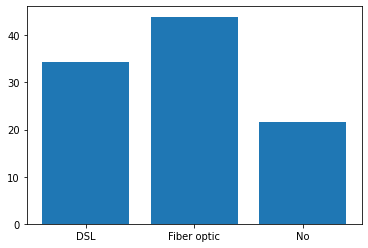

In [52]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('InternetService').agg({'InternetService': 'count'})
attribute_data['percent'] = attribute_data.InternetService*100/sum(attribute_data.InternetService)
print(f'Number of NA: {raw_data.InternetService.isnull().sum()}, {raw_data.InternetService.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,OnlineSecurity,percent
OnlineSecurity,,
No,3498,49.666335
No internet service,1526,21.666903
Yes,2019,28.666761


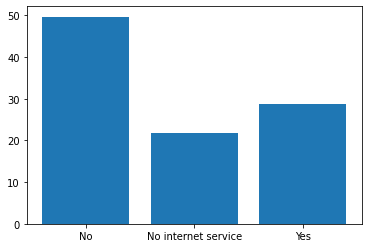

In [53]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('OnlineSecurity').agg({'OnlineSecurity': 'count'})
attribute_data['percent'] = attribute_data.OnlineSecurity*100/sum(attribute_data.OnlineSecurity)
print(f'Number of NA: {raw_data.OnlineSecurity.isnull().sum()}, {raw_data.OnlineSecurity.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,OnlineBackup,percent
OnlineBackup,,
No,3088,43.844952
No internet service,1526,21.666903
Yes,2429,34.488144


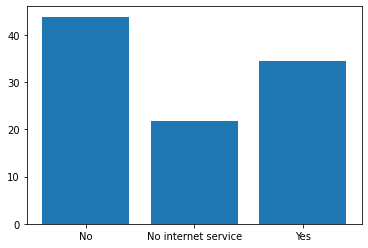

In [54]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('OnlineBackup').agg({'OnlineBackup': 'count'})
attribute_data['percent'] = attribute_data.OnlineBackup*100/sum(attribute_data.OnlineBackup)
print(f'Number of NA: {raw_data.OnlineBackup.isnull().sum()}, {raw_data.OnlineBackup.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,DeviceProtection,percent
DeviceProtection,,
No,3095,43.944342
No internet service,1526,21.666903
Yes,2422,34.388755


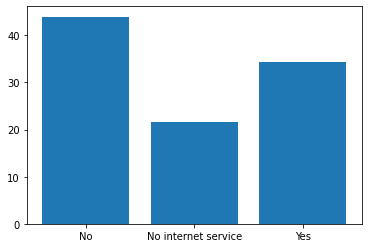

In [55]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('DeviceProtection').agg({'DeviceProtection': 'count'})
attribute_data['percent'] = attribute_data.DeviceProtection*100/sum(attribute_data.DeviceProtection)
print(f'Number of NA: {raw_data.DeviceProtection.isnull().sum()}, {raw_data.DeviceProtection.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,TechSupport,percent
TechSupport,,
No,3473,49.311373
No internet service,1526,21.666903
Yes,2044,29.021724


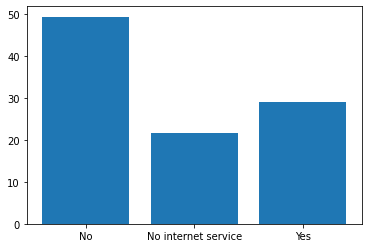

In [56]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('TechSupport').agg({'TechSupport': 'count'})
attribute_data['percent'] = attribute_data.TechSupport*100/sum(attribute_data.TechSupport)
print(f'Number of NA: {raw_data.TechSupport.isnull().sum()}, {raw_data.TechSupport.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,StreamingTV,percent
StreamingTV,,
No,2810,39.897771
No internet service,1526,21.666903
Yes,2707,38.435326


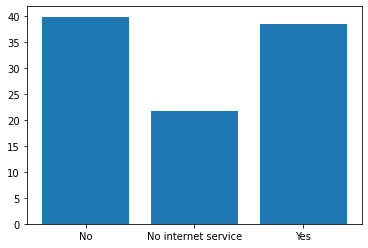

In [57]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('StreamingTV').agg({'StreamingTV': 'count'})
attribute_data['percent'] = attribute_data.StreamingTV*100/sum(attribute_data.StreamingTV)
print(f'Number of NA: {raw_data.StreamingTV.isnull().sum()}, {raw_data.StreamingTV.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,StreamingMovies,percent
StreamingMovies,,
No,2785,39.542808
No internet service,1526,21.666903
Yes,2732,38.790288


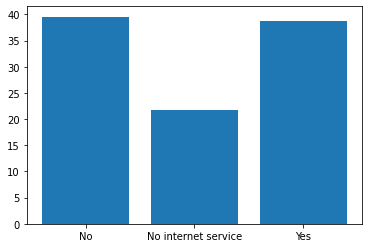

In [58]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('StreamingMovies').agg({'StreamingMovies': 'count'})
attribute_data['percent'] = attribute_data.StreamingMovies*100/sum(attribute_data.StreamingMovies)
print(f'Number of NA: {raw_data.StreamingMovies.isnull().sum()}, {raw_data.StreamingMovies.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,Contract,percent
Contract,,
Month-to-month,3875,55.019168
One year,1473,20.914383
Two year,1695,24.066449


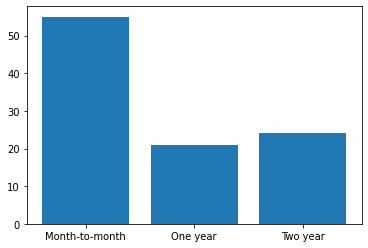

In [59]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('Contract').agg({'Contract': 'count'})
attribute_data['percent'] = attribute_data.Contract*100/sum(attribute_data.Contract)
print(f'Number of NA: {raw_data.Contract.isnull().sum()}, {raw_data.Contract.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,PaperlessBilling,percent
PaperlessBilling,,
No,2872,40.778078
Yes,4171,59.221922


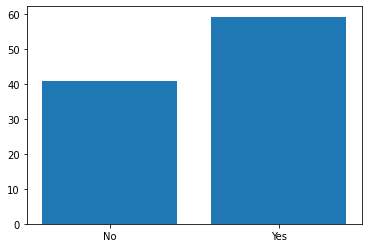

In [60]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('PaperlessBilling').agg({'PaperlessBilling': 'count'})
attribute_data['percent'] = attribute_data.PaperlessBilling*100/sum(attribute_data.PaperlessBilling)
print(f'Number of NA: {raw_data.PaperlessBilling.isnull().sum()}, {raw_data.PaperlessBilling.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


,PaymentMethod,percent
PaymentMethod,,
Bank transfer (automatic),1544,21.922476
Credit card (automatic),1522,21.610109
Electronic check,2365,33.579441
Mailed check,1612,22.887974


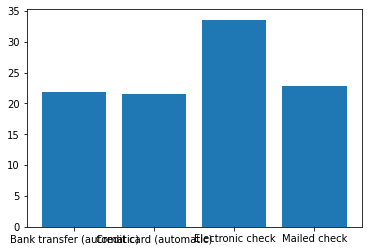

In [61]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('PaymentMethod').agg({'PaymentMethod': 'count'})
attribute_data['percent'] = attribute_data.PaymentMethod*100/sum(attribute_data.PaymentMethod)
print(f'Number of NA: {raw_data.PaymentMethod.isnull().sum()}, {raw_data.PaymentMethod.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Number of NA: 0, 0.0%


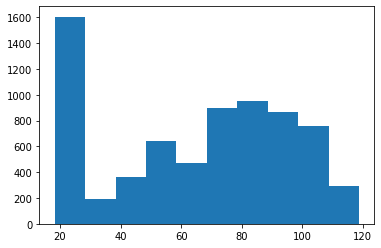

In [62]:
fig_gender, ax_gender = plt.subplots()
#attribute_data = raw_data.groupby('PaymentMethod').agg({'PaymentMethod': 'count'})
#attribute_data['percent'] = attribute_data.PaymentMethod*100/sum(attribute_data.PaymentMethod)
#display(attribute_data)
print(f'Number of NA: {raw_data.MonthlyCharges.isnull().sum()}, {raw_data.MonthlyCharges.isnull().sum()*100/raw_data.shape[0]}%')
plt.hist(raw_data.MonthlyCharges)
plt.show()

Number of NA: 11, 0.15618344455487718%


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


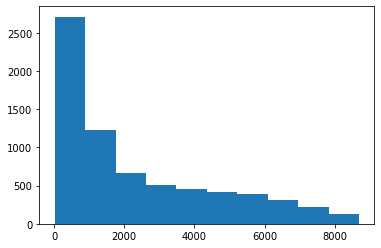

In [63]:
fig_gender, ax_gender = plt.subplots()
#attribute_data = raw_data.groupby('PaymentMethod').agg({'PaymentMethod': 'count'})
#attribute_data['percent'] = attribute_data.PaymentMethod*100/sum(attribute_data.PaymentMethod)
#display(attribute_data)
print(f'Number of NA: {raw_data.TotalCharges_num.isnull().sum()}, {raw_data.TotalCharges_num.isnull().sum()*100/raw_data.shape[0]}%')
plt.hist(raw_data.TotalCharges_num)
plt.show()

Number of NA: 0, 0.0%


,Churn,percent
Churn,,
No,5174,73.463013
Yes,1869,26.536987


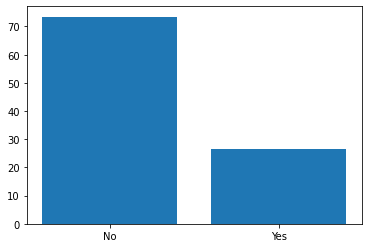

In [64]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('Churn').agg({'Churn': 'count'})
attribute_data['percent'] = attribute_data.Churn*100/sum(attribute_data.Churn)
print(f'Number of NA: {raw_data.Churn.isnull().sum()}, {raw_data.Churn.isnull().sum()*100/raw_data.shape[0]}%')
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

Conclusions from initial exploration:
- Unbalanced dataset: 73.5% no churn vs 26.5% churn
- I would say there are two different groups: internet vs no internet
- Tenure decreases fast the first 5 years, then number of clients is more or less constant. So the problem is the first 5 years
- Very few senior citizens. It might be worth it to study them as a separate group?
- The group with no phone service is very small. Should be studied apart?
- Same thing applies to no Interent service. Should be studied apart?
- Maybe the one and two year contracts are attached to lower charges, and also longer tenure? Analyze that.
- Need to check monthly charges and yearly charges.
- Need to check how each feature relates to Churn/NoChurn
- There are 11 cases of tenure 0, meaning the clients just sign up. Should we consider them, or else delete them from the dataset? --> Delete them, we don't even know if they churn because there were not enought time for them to churn


In [65]:
print(raw_data.shape)
raw_data = raw_data.loc[raw_data.tenure>0, :] # Delete those whose tenure =0
print(raw_data.shape)

(7043, 22)
(7032, 22)


Number of NA: 0, 0.0%


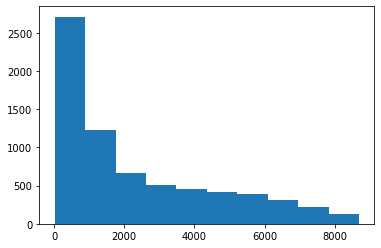

In [66]:
fig_gender, ax_gender = plt.subplots()
#attribute_data = raw_data.groupby('PaymentMethod').agg({'PaymentMethod': 'count'})
#attribute_data['percent'] = attribute_data.PaymentMethod*100/sum(attribute_data.PaymentMethod)
#display(attribute_data)
print(f'Number of NA: {raw_data.TotalCharges_num.isnull().sum()}, {raw_data.TotalCharges_num.isnull().sum()*100/raw_data.shape[0]}%')
plt.hist(raw_data.TotalCharges_num)
plt.show()

Number of NA: 0, 0.0%


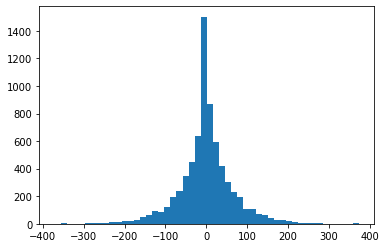

In [72]:
raw_data['diff_charges'] = raw_data['TotalCharges_num']-raw_data['tenure']*raw_data['MonthlyCharges']
fig_gender, ax_gender = plt.subplots()
#attribute_data = raw_data.groupby('PaymentMethod').agg({'PaymentMethod': 'count'})
#attribute_data['percent'] = attribute_data.PaymentMethod*100/sum(attribute_data.PaymentMethod)
#display(attribute_data)
print(f'Number of NA: {raw_data.diff_charges.isnull().sum()}, {raw_data.diff_charges.isnull().sum()*100/raw_data.shape[0]}%')
plt.hist(raw_data.diff_charges, bins=50)
plt.show()

In [70]:
total_charges_grouped = raw_data.groupby('Contract').agg({'MonthlyCharges': 'mean'})
display(total_charges_grouped)

,MonthlyCharges
Contract,
Month-to-month,66.398490
One year,65.079416
Two year,60.872374


In [77]:
raw_data['churn_num'] = raw_data['Churn'].apply(lambda churn: 1 if churn=='Yes' else 0)
display(raw_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_num,diff_charges,churn_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,0.00,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50,-46.80,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15,0.45,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75,-62.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65,10.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,1990.50,-44.70,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,7362.90,-67.50,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,346.45,20.85,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,306.60,9.00,1


In [78]:
#'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
# 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
# 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
# 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
# 'MonthlyCharges' 'TotalCharges'

churn_behavior = raw_data.groupby('gender').apply(lambda group: group.churn_num.sum()*100/group.shape[0])
churn_behavior

gender
Female    26.959518
Male      26.204565
dtype: float64

In [0]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
 #'MonthlyCharges' 'TotalCharges']

In [87]:
for variable in columns:
  churn_behavior = raw_data.groupby(variable).apply(lambda group: group.churn_num.sum()*100/group.shape[0])
  display(churn_behavior)
  

gender
Female    26.959518
Male      26.204565
dtype: float64

SeniorCitizen
0    23.650255
1    41.681261
dtype: float64

Partner
No     32.976092
Yes    19.717065
dtype: float64

Dependents
No     31.279140
Yes    15.531205
dtype: float64

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Length: 72, dtype: float64

PhoneService
No     25.000000
Yes    26.747481
dtype: float64

MultipleLines
No                  25.081241
No phone service    25.000000
Yes                 28.648466
dtype: float64

InternetService
DSL            18.998344
Fiber optic    41.892765
No              7.434211
dtype: float64

OnlineSecurity
No                     41.778667
No internet service     7.434211
Yes                    14.640199
dtype: float64

OnlineBackup
No                     39.941691
No internet service     7.434211
Yes                    21.567010
dtype: float64

DeviceProtection
No                     39.140271
No internet service     7.434211
Yes                    22.539289
dtype: float64

TechSupport
No                     41.647465
No internet service     7.434211
Yes                    15.196078
dtype: float64

StreamingTV
No                     33.535066
No internet service     7.434211
Yes                    30.114687
dtype: float64

StreamingMovies
No                     33.728875
No internet service     7.434211
Yes                    29.952398
dtype: float64

Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
dtype: float64

PaperlessBilling
No     16.375698
Yes    33.589251
dtype: float64

PaymentMethod
Bank transfer (automatic)    16.731518
Credit card (automatic)      15.253123
Electronic check             45.285412
Mailed check                 19.201995
dtype: float64

Observations:
- Senior citizens seem to churn with higher probability
- People with no partner or no dependents too
- As observed before, probability of churn decreases with tenure
- Not having internet service highly decreases probabily of churn
- Fiber optic users churn much more
- Having tech support, online security, online backup, device protection decreases the chances of churn. Probably this is a pack of services?
- Streaming TV and Streaming Movies have very similar percentages, same pack?
- 2-year contracts decreases chances of churn quite a lot, followed by 1-year contract
- Payment by electronic check shows also 2-3times churn than rest of groups

In [91]:
churn_behavior = raw_data.groupby('Contract').agg({'tenure': 'mean'})
display(churn_behavior)

,tenure
Contract,
Month-to-month,18.036645
One year,42.073370
Two year,57.071810


(array([  3.,   3.,   5.,   8.,  17.,   3.,   5.,  14.,  11.,  12.,   7.,
         10.,   8.,   4.,  10.,  12.,  25.,   4.,  11.,   6.,  10.,  13.,
         10.,  24.,   9.,  11.,  24.,   9.,  26.,  13.,  27.,  25.,  22.,
         36.,  18.,  44.,  18.,  28.,  43.,  28.,  50.,  33.,  67.,  39.,
         40.,  85.,  56., 131.,  88., 480.]),
 array([ 1.  ,  2.42,  3.84,  5.26,  6.68,  8.1 ,  9.52, 10.94, 12.36,
        13.78, 15.2 , 16.62, 18.04, 19.46, 20.88, 22.3 , 23.72, 25.14,
        26.56, 27.98, 29.4 , 30.82, 32.24, 33.66, 35.08, 36.5 , 37.92,
        39.34, 40.76, 42.18, 43.6 , 45.02, 46.44, 47.86, 49.28, 50.7 ,
        52.12, 53.54, 54.96, 56.38, 57.8 , 59.22, 60.64, 62.06, 63.48,
        64.9 , 66.32, 67.74, 69.16, 70.58, 72.  ]),
 <a list of 50 Patch objects>)

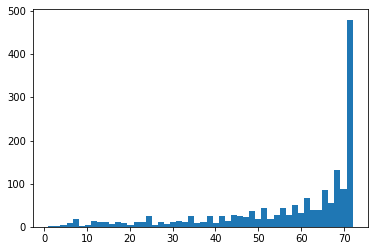

In [96]:
plt.hist(raw_data.loc[raw_data.Contract=='Two year', 'tenure'], bins=50)

(array([14.,  6., 11.,  7., 23., 11., 15., 36., 15., 28.,  7., 40., 13.,
        13., 35., 26., 41., 26., 20., 41., 19., 35., 23., 46., 19., 19.,
        43., 21., 49., 23., 43., 23., 19., 50., 31., 62., 36., 23., 58.,
        17., 48., 24., 56., 21., 29., 53., 34., 48., 27., 45.]),
 array([ 1.  ,  2.42,  3.84,  5.26,  6.68,  8.1 ,  9.52, 10.94, 12.36,
        13.78, 15.2 , 16.62, 18.04, 19.46, 20.88, 22.3 , 23.72, 25.14,
        26.56, 27.98, 29.4 , 30.82, 32.24, 33.66, 35.08, 36.5 , 37.92,
        39.34, 40.76, 42.18, 43.6 , 45.02, 46.44, 47.86, 49.28, 50.7 ,
        52.12, 53.54, 54.96, 56.38, 57.8 , 59.22, 60.64, 62.06, 63.48,
        64.9 , 66.32, 67.74, 69.16, 70.58, 72.  ]),
 <a list of 50 Patch objects>)

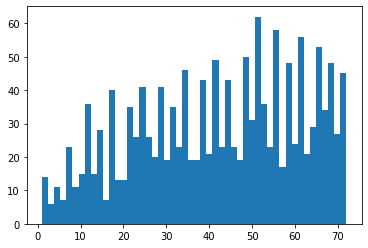

In [97]:
plt.hist(raw_data.loc[raw_data.Contract=='One year', 'tenure'], bins=50)

(array([834., 191., 293.,  95., 214., 105.,  96., 166.,  83., 135.,  66.,
        134.,  52.,  54., 108.,  47., 107.,  49.,  41.,  82.,  43.,  86.,
         31.,  83.,  22.,  35.,  48.,  34.,  60.,  29.,  42.,  26.,  27.,
         44.,  19.,  42.,  16.,  17.,  43.,  20.,  29.,  19.,  23.,  12.,
         11.,  27.,   8.,  16.,   4.,   7.]),
 array([ 1.  ,  2.42,  3.84,  5.26,  6.68,  8.1 ,  9.52, 10.94, 12.36,
        13.78, 15.2 , 16.62, 18.04, 19.46, 20.88, 22.3 , 23.72, 25.14,
        26.56, 27.98, 29.4 , 30.82, 32.24, 33.66, 35.08, 36.5 , 37.92,
        39.34, 40.76, 42.18, 43.6 , 45.02, 46.44, 47.86, 49.28, 50.7 ,
        52.12, 53.54, 54.96, 56.38, 57.8 , 59.22, 60.64, 62.06, 63.48,
        64.9 , 66.32, 67.74, 69.16, 70.58, 72.  ]),
 <a list of 50 Patch objects>)

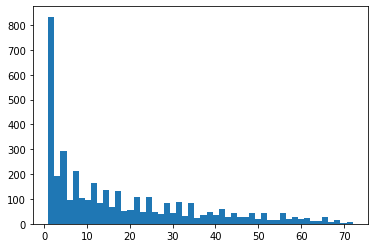

In [98]:
plt.hist(raw_data.loc[raw_data.Contract=='Month-to-month', 'tenure'], bins=50)

It is clear that tenure and contract are directly related. But there are tenures lower than 2 years with 2-year contracts, which means that the intent of the person is present when contracting the services (i.e. customers can take a 2-year contract and then churn before the 2nd year)